# Evaluation of Filter Finder

Setup correct path and import required modules

In [2]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [3]:
import tensorflow as tf
import src.model as models
import src.data as d
import src.metrics as metrics
import src.training as training
import src.loss as loss
import src.visual as vis
import hyperparams
import numpy as np

### Data

Load hyperparams and data module

In [4]:
hparams = hyperparams.create_hparams()
data = d.Data(hparams)

[[5, 5, 1, 32], [5, 5, 32, 64]]


In [5]:
pathset = [ (120,9900, 11000), (20, 9900, 11000),
            (60, 16000, 17000),(70, 16000, 17000),
            (400, 8500, 27000),(400, 7000, 27000),
            (300, 7000, 21500),(151, 4500, 5000),
            (51, 18000, 9500), (52, 18000, 7500),
            (55, 18000, 7500), (60, 18100, 8400)]

### Restore Model

Restore trained model from last checkpoint

In [5]:
model = models.create_model(hparams, data,train= False)

InvalidArgumentError: Assign requires shapes of both tensors to match. lhs shape= [32,32,1,1] rhs shape= [7,7,1,3]
	 [[Node: save/Assign_3 = Assign[T=DT_FLOAT, _class=["loc:@Filters/layer_0"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/gpu:0"](Filters/layer_0/Momentum, save/RestoreV2_3/_25)]]

Caused by op u'save/Assign_3', defined at:
  File "/usr/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-d61b901a47d0>", line 1, in <module>
    model = models.create_model(hparams, data,train= False)
  File "/FilterFinder/src/model.py", line 89, in create_model
    g.saver = tf.train.Saver()
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 1051, in __init__
    self.build()
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 1081, in build
    restore_sequentially=self._restore_sequentially)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 675, in build
    restore_sequentially, reshape)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 414, in _AddRestoreOps
    assign_ops.append(saveable.restore(tensors, shapes))
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 155, in restore
    self.op.get_shape().is_fully_defined())
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/gen_state_ops.py", line 47, in assign
    use_locking=use_locking, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 2395, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 1264, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Assign requires shapes of both tensors to match. lhs shape= [32,32,1,1] rhs shape= [7,7,1,3]
	 [[Node: save/Assign_3 = Assign[T=DT_FLOAT, _class=["loc:@Filters/layer_0"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/gpu:0"](Filters/layer_0/Momentum, save/RestoreV2_3/_25)]]


### Run evaluation

Get batch of data defined in pathset and decide what params to retrieve from the model

In [6]:
t, s = data.getBatch(hparams, pathset)

model_run =[model.l,
            model.p_max,
            model.p_max_2,
            model.p,
            model.source_alpha,
            model.template_alpha,
            model.kernel_conv[-1]]

feed_dict ={model.image: s, 
            model.template: t, 
            model.dropout: 1}

NameError: name 'model' is not defined

In [ ]:
args = model.sess.run(model_run,feed_dict=feed_dict)

### Visualize

In [6]:

vis.xcsurface(np.zeros((5,5)))

In [7]:
t, s = data.getBatch(hparams, pathset)

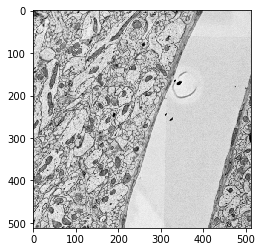

In [39]:
vis.show(s[3])